In [1]:
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
from offline_models.Svm import Svm
from offline_models.Bayes import Bayes
from offline_models.FeatureSelection import FeatureSelection
from offline_models.Graphics import Graphics
from offline_models.RandomForest import RandomForest
from offline_models.Mlp import Mlp


In [2]:
generos = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'ScienceFiction', 'TVMovie', 'Thriller', 'War', 'Western', 'adult','movie_popularity','movie_overall_grade']

def read_parquet(pasta):
    arquivos_parquet = glob.glob(os.path.join(pasta, '*.parquet'))
    lista_df = [pd.read_parquet(arquivo) for arquivo in arquivos_parquet]
    df = pd.concat(lista_df, ignore_index=True)
    return df

In [3]:
df_parquet = read_parquet('./preprocess/movies')[generos]
label = 'Action'
features = generos.copy()
features.remove(label)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_parquet[features], df_parquet[label], test_size=0.3, random_state=42, stratify=df_parquet[label])
selection = FeatureSelection(X_train, y_train)
bayes = Bayes(X_train, X_test, y_train, y_test)
random_forest = RandomForest(X_train, X_test, y_train, y_test)
mlp = Mlp(X_train, X_test, y_train, y_test)
svm = Svm(X_train, X_test, y_train, y_test)
plot = Graphics()

## Bayes

In [5]:
VERSAO = ['all_features', 'pca', 'SelectKBest', 'RandomForest'] # ['all_features', 'pca', 'SelectKBest', 'RandomForest']
dataNB_media = {}
dataNB_test = {}
for v in VERSAO:
    if v == 'all_features':
        dataNB_media[v], dataNB_test[v] = bayes.features("ALL FEATURES")
    if v == 'pca':
        dataNB_media[v], dataNB_test[v] = bayes.features_pca()
    if v == 'SelectKBest':
        generos_selecionados = selection.func_SelectKBest()
        dataNB_media[v], dataNB_test[v] = bayes.features("Select KBest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')
    if v == 'RandomForest':
        generos_selecionados = selection.func_RandomForest()
        dataNB_media[v], dataNB_test[v] = bayes.features("Random Forest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')  
        

=============   ALL FEATURES - Media  das validações  ==============
Média de Precisão: 0.8450 ± 0.0066
Média de Revocação: 0.7446 ± 0.0131
Média de F1-Score: 0.7754 ± 0.0108
Média de Acurácia: 0.7446 ± 0.0131
Melhor alpha encontrado: 0.1
=============   ALL FEATURES - Teste  ==============
Média de Precisão: 0.8435 ± 0.0000
Média de Revocação: 0.7568 ± 0.0000
Média de F1-Score: 0.7846 ± 0.0000
Média de Acurácia: 0.7568 ± 0.0000
Melhor alpha encontrado: 0.1


/home/otavio/Documentos/estudos/dataset-movies/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/otavio/Documentos/estudos/dataset-movies/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/otavio/Documentos/estudos/dataset-movies/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

=============  PCA - Media das validações  ==============
Média de Precisão: 0.7512 ± 0.0835
Média de Revocação: 0.7755 ± 0.2066
Média de F1-Score: 0.7006 ± 0.2191
Média de Acurácia: 0.7755 ± 0.2066
Melhor alpha encontrado: 0.1
=============   PCA - Teste  ==============
Média de Precisão: 0.7521 ± 0.0000
Média de Revocação: 0.8439 ± 0.0000
Média de F1-Score: 0.7735 ± 0.0000
Média de Acurácia: 0.8439 ± 0.0000
Melhor alpha encontrado: 0.1
=============   Select KBest - Media  das validações  ==============
Média de Precisão: 0.8356 ± 0.0074
Média de Revocação: 0.7224 ± 0.0125
Média de F1-Score: 0.7572 ± 0.0105
Média de Acurácia: 0.7224 ± 0.0125
Melhor alpha encontrado: 0.1
=============   Select KBest - Teste  ==============
Média de Precisão: 0.8435 ± 0.0000
Média de Revocação: 0.7568 ± 0.0000
Média de F1-Score: 0.7846 ± 0.0000
Média de Acurácia: 0.7568 ± 0.0000
Melhor alpha encontrado: 0.1
Features selecionadas: ['Adventure', 'Crime', 'Documentary', 'ScienceFiction', 'Thriller']
=====

In [6]:
dataNB_media

{'all_features': {'mean_f1': 0.78,
  'std_f1': 0.0108,
  'mean_accuracy': 0.74,
  'std_accuracy': 0.0131,
  'mean_recall': 0.74,
  'std_recall': 0.0131,
  'mean_precision': 0.85,
  'std_precision': 0.0066},
 'pca': {'mean_f1': 0.7,
  'std_f1': 0.2191,
  'mean_accuracy': 0.78,
  'std_accuracy': 0.2066,
  'mean_recall': 0.78,
  'std_recall': 0.2066,
  'mean_precision': 0.75,
  'std_precision': 0.0835},
 'SelectKBest': {'mean_f1': 0.76,
  'std_f1': 0.0105,
  'mean_accuracy': 0.72,
  'std_accuracy': 0.0125,
  'mean_recall': 0.72,
  'std_recall': 0.0125,
  'mean_precision': 0.84,
  'std_precision': 0.0074},
 'RandomForest': {'mean_f1': 0.79,
  'std_f1': 0.0104,
  'mean_accuracy': 0.77,
  'std_accuracy': 0.0123,
  'mean_recall': 0.77,
  'std_recall': 0.0123,
  'mean_precision': 0.82,
  'std_precision': 0.0079}}

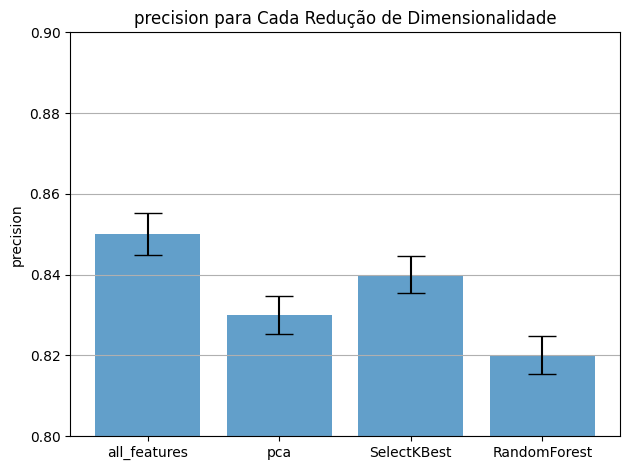

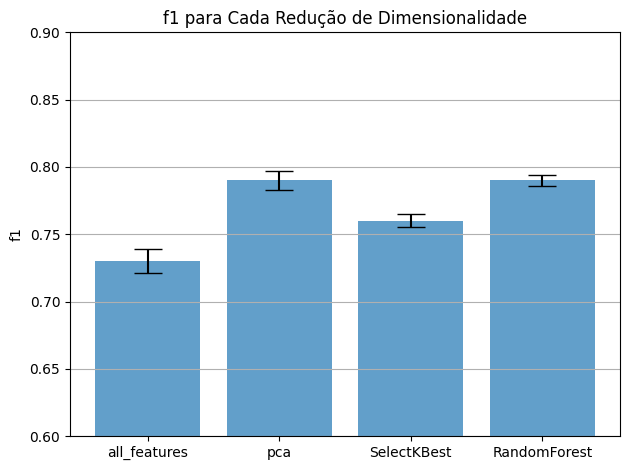

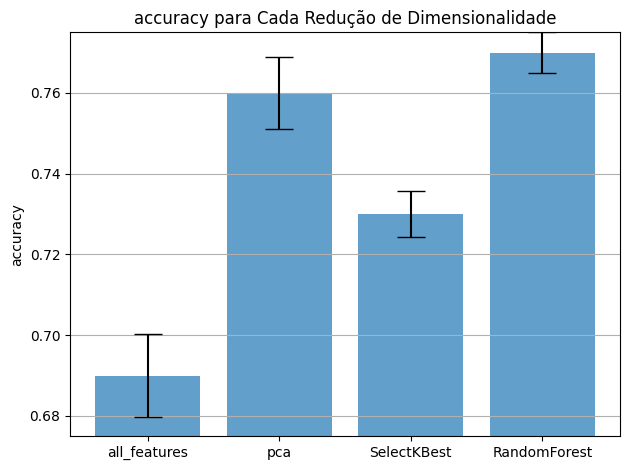

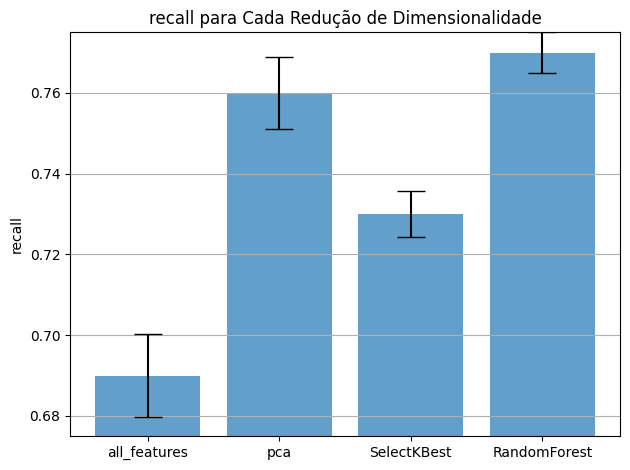

In [6]:
plot.modelo_unico(dataNB_media, 'precision', [0.8, 0.9])
plot.modelo_unico(dataNB_media, 'f1')
plot.modelo_unico(dataNB_media, 'accuracy', [0.675, 0.775])
plot.modelo_unico(dataNB_media, 'recall', [0.675, 0.775])

In [ ]:
plot.modelo_unico(dataNB_test, 'precision', interval=[0.8, 0.9])
plot.modelo_unico(dataNB_test, 'f1')
plot.modelo_unico(dataNB_test, 'accuracy', interval=[0.675, 0.775])
plot.modelo_unico(dataNB_test, 'recall', interval=[0.675, 0.775])

## Random Forest

In [7]:
VERSAO = ['all_features', 'pca', 'SelectKBest', 'RandomForest'] # ['all_features', 'pca', 'SelectKBest', 'RandomForest']
dataRF_media = {}
dataRF_test = {}
for v in VERSAO:
    if v == 'all_features':
        dataRF_media[v], dataRF_test[v] = random_forest.features("ALL FEATURES")
    if v == 'pca':
        dataRF_media[v], dataRF_test[v] = random_forest.features_pca()
    if v == 'SelectKBest':
        generos_selecionados = selection.func_SelectKBest()
        dataRF_media[v], dataRF_test[v] = random_forest.features("Select KBest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')
    if v == 'RandomForest':
        generos_selecionados = selection.func_RandomForest()
        dataRF_media[v], dataRF_test[v] = random_forest.features("Random Forest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')  

# PRA MELHORAR O TEMPO DO RANDOM FOREST TEM QUE MUDAR OS HIPERPARAMETROS

=============   ALL FEATURES - Media das validações  ==============
Média de Precisão: 0.8637 ± 0.0016
Média de Revocação: 0.7731 ± 0.0063
Média de F1-Score: 0.7998 ± 0.0050
Média de Acurácia: 0.7731 ± 0.0063
Melhor n_estimators encontrado: 100
Melhor criterion encontrado: entropy
Melhor max_depth encontrado: 20
Melhor min_samples_split encontrado: 50
Melhor min_samples_leaf encontrado: 2
Melhor max_features encontrado: sqrt
=============   ALL FEATURES - Teste  ==============
Média de Precisão: 0.8646 ± 0.0000
Média de Revocação: 0.7740 ± 0.0000
Média de F1-Score: 0.8006 ± 0.0000
Média de Acurácia: 0.7740 ± 0.0000
Melhor n_estimators encontrado: 100
Melhor criterion encontrado: entropy
Melhor max_depth encontrado: 20
Melhor min_samples_split encontrado: 50
Melhor min_samples_leaf encontrado: 2
Melhor max_features encontrado: sqrt
=============  PCA - Media das validações  ==============
Média de Precisão: 0.8593 ± 0.0020
Média de Revocação: 0.7653 ± 0.0037
Média de F1-Score: 0.7932 ± 

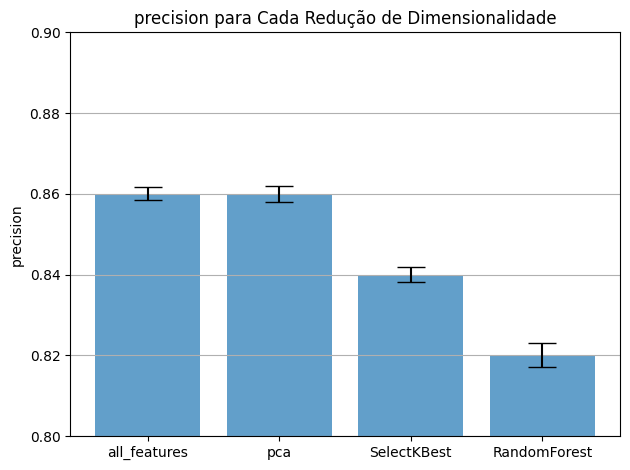

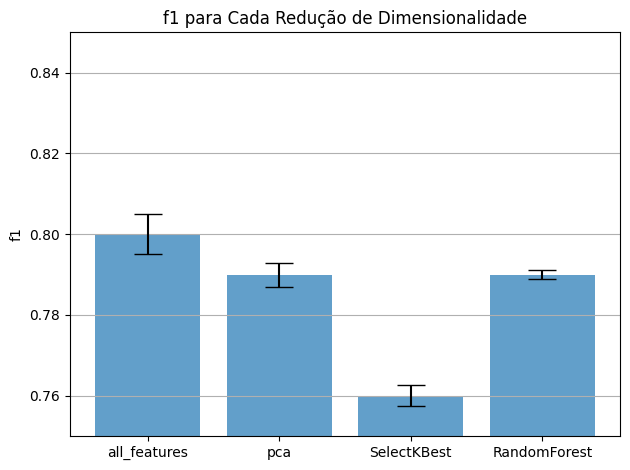

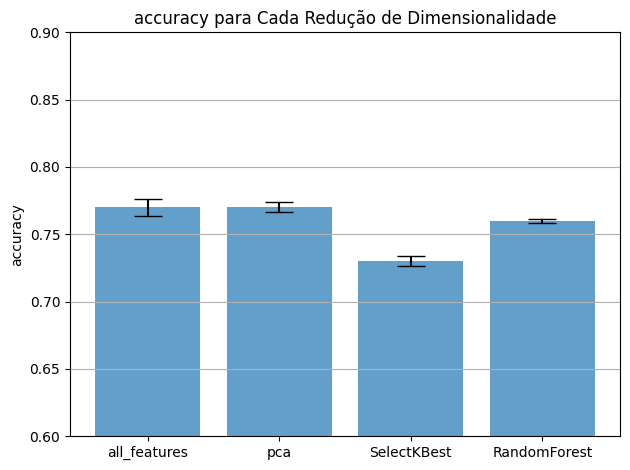

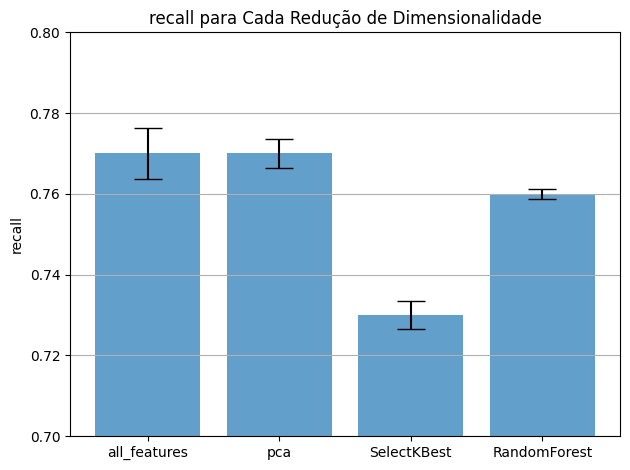

In [8]:
plot.modelo_unico(dataRF_media, 'precision', [0.8, 0.9])
plot.modelo_unico(dataRF_media, 'f1', [0.75, 0.85])
plot.modelo_unico(dataRF_media, 'accuracy')
plot.modelo_unico(dataRF_media, 'recall', [0.7, 0.8])

## SVM

In [9]:
VERSAO = ['all_features', 'pca', 'SelectKBest', 'RandomForest'] # ['all_features', 'pca', 'SelectKBest', 'RandomForest']
dataSVM_media = {}
dataSVM_test = {}
for v in VERSAO:
    if v == 'all_features':
        dataSVM_media[v], dataSVM_test[v] = svm.features("ALL FEATURES")
    if v == 'pca':
        dataSVM_media[v], dataSVM_test[v] = svm.features_pca()
    if v == 'SelectKBest':
        generos_selecionados = selection.func_SelectKBest()
        dataSVM_media[v], dataSVM_test[v] = svm.features("Select KBest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')
    if v == 'RandomForest':
        generos_selecionados = selection.func_RandomForest()
        dataSVM_media[v], dataSVM_test[v] = svm.features("Random Forest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')  

=============   ALL FEATURES - Media  das validações  ==============
Média de Precisão: 0.8613 ± 0.0014
Média de Revocação: 0.7763 ± 0.0062
Média de F1-Score: 0.8019 ± 0.0049
Média de Acurácia: 0.7763 ± 0.0062
Melhor C encontrado: 25
Melhor gamma encontrado: 0.1
Melhor kernel encontrado: rbf
=============   ALL FEATURES - Teste  ==============
Média de Precisão: 0.8626 ± 0.0000
Média de Revocação: 0.7788 ± 0.0000
Média de F1-Score: 0.8041 ± 0.0000
Média de Acurácia: 0.7788 ± 0.0000
Melhor C encontrado: 25
Melhor gamma encontrado: 0.1
Melhor kernel encontrado: rbf
=============  PCA - Media das validações  ==============
Média de Precisão: 0.8569 ± 0.0012
Média de Revocação: 0.7684 ± 0.0012
Média de F1-Score: 0.7953 ± 0.0008
Média de Acurácia: 0.7684 ± 0.0012
Melhor C encontrado: 50
Melhor gamma encontrado: 0.5
Melhor kernel encontrado: poly
=============   PCA - Teste  ==============
Média de Precisão: 0.8577 ± 0.0000
Média de Revocação: 0.7630 ± 0.0000
Média de F1-Score: 0.7912 ± 0.00

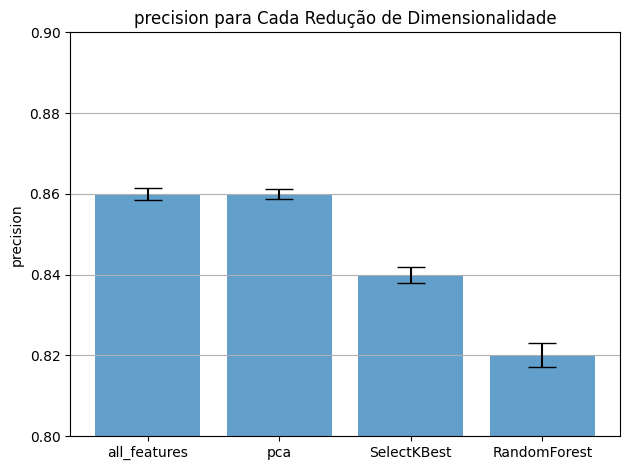

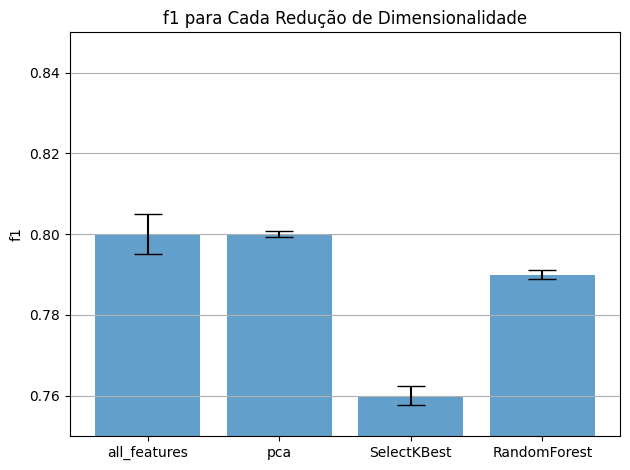

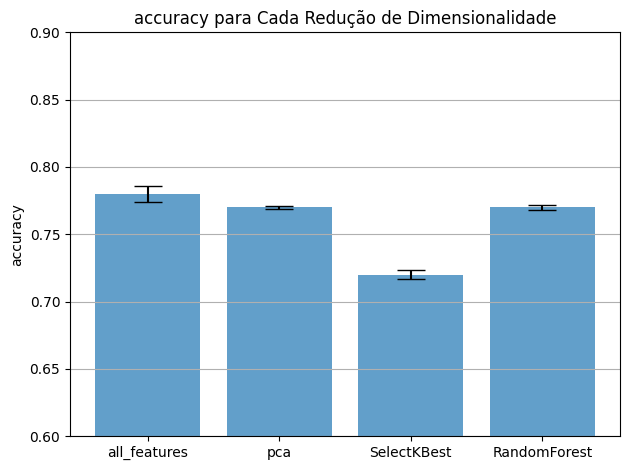

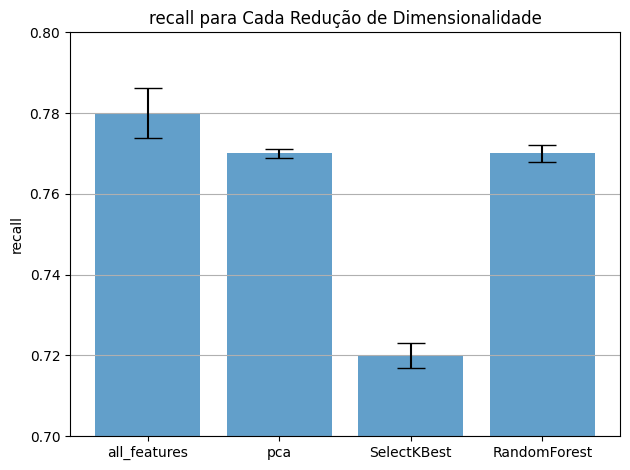

In [10]:
plot.modelo_unico(dataSVM_media, 'precision', [0.8, 0.9])
plot.modelo_unico(dataSVM_media, 'f1', [0.75, 0.85])
plot.modelo_unico(dataSVM_media, 'accuracy')
plot.modelo_unico(dataSVM_media, 'recall', [0.7, 0.8])

## MLP

In [5]:
VERSAO = ['all_features', 'pca', 'SelectKBest', 'RandomForest'] # ['all_features', 'pca', 'SelectKBest', 'RandomForest']
dataMLP_media = {}
dataMLP_test = {}
for v in VERSAO:
    if v == 'all_features':
        dataMLP_media[v], dataMLP_test[v] = mlp.features("ALL FEATURES")
    if v == 'pca':
        dataMLP_media[v], dataMLP_test[v] = mlp.features_pca()
    if v == 'SelectKBest':
        generos_selecionados = selection.func_SelectKBest()
        dataMLP_media[v], dataMLP_test[v] = mlp.features("Select KBest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')
    if v == 'RandomForest':
        generos_selecionados = selection.func_RandomForest()
        dataMLP_media[v], dataMLP_test[v] = mlp.features("Random Forest", generos_selecionados)
        print(f'Features selecionadas: {generos_selecionados}')  

=============   ALL FEATURES - Media  das validações  ==============
Média de Precisão: 0.8633 ± 0.0042
Média de Revocação: 0.7797 ± 0.0073
Média de F1-Score: 0.8049 ± 0.0061
Média de Acurácia: 0.7797 ± 0.0073
Melhor número de neurônios encontrado: (16,)
Melhor função de ativação encontrada: relu
Melhor taxa de aprendizado encontrada: 0.001
=============   ALL FEATURES - Teste  ==============
Média de Precisão: 0.8635 ± 0.0000
Média de Revocação: 0.7782 ± 0.0000
Média de F1-Score: 0.8037 ± 0.0000
Média de Acurácia: 0.7782 ± 0.0000
Melhor número de neurônios encontrado: (16,)
Melhor função de ativação encontrada: relu
Melhor taxa de aprendizado encontrada: 0.001
=============  PCA - Media das validações  ==============
Média de Precisão: 0.8583 ± 0.0029
Média de Revocação: 0.7676 ± 0.0061
Média de F1-Score: 0.7948 ± 0.0048
Média de Acurácia: 0.7676 ± 0.0061
Melhor número de neurônios encontrado: (64,)
Melhor função de ativação encontrada: relu
Melhor taxa de aprendizado encontrada: 0.00

In [6]:
dataMLP_media

{'all_features': {'mean_f1': 0.8,
  'std_f1': 0.0061,
  'mean_accuracy': 0.78,
  'std_accuracy': 0.0073,
  'mean_recall': 0.78,
  'std_recall': 0.0073,
  'mean_precision': 0.86,
  'std_precision': 0.0042},
 'pca': {'mean_f1': 0.79,
  'std_f1': 0.0048,
  'mean_accuracy': 0.77,
  'std_accuracy': 0.0061,
  'mean_recall': 0.77,
  'std_recall': 0.0061,
  'mean_precision': 0.86,
  'std_precision': 0.0029},
 'SelectKBest': {'mean_f1': 0.77,
  'std_f1': 0.0241,
  'mean_accuracy': 0.74,
  'std_accuracy': 0.0349,
  'mean_recall': 0.74,
  'std_recall': 0.0349,
  'mean_precision': 0.83,
  'std_precision': 0.0084},
 'RandomForest': {'mean_f1': 0.8,
  'std_f1': 0.008,
  'mean_accuracy': 0.78,
  'std_accuracy': 0.011,
  'mean_recall': 0.78,
  'std_recall': 0.011,
  'mean_precision': 0.83,
  'std_precision': 0.0042}}

## Comparando todos modelos

In [7]:
# json = {
#     "random_forest": dataRF_media,
#     "bayes": dataNB_media,
#     "svm": dataSVM_media,  # Adicione mais modelos conforme necessário
# }

# exemplo de json
json = {
 'random_forest': {
  'all_features': {
   'mean_f1': 0.8,
   'std_f1': 0.0072,
   'mean_accuracy': 0.78,
   'std_accuracy': 0.0091,
   'mean_recall': 0.78,
   'std_recall': 0.0091,
   'mean_precision': 0.86,
   'std_precision': 0.0025},
  'pca': {'mean_f1': 0.8,
   'std_f1': 0.0044,
   'mean_accuracy': 0.77,
   'std_accuracy': 0.0055,
   'mean_recall': 0.77,
   'std_recall': 0.0055,
   'mean_precision': 0.86,
   'std_precision': 0.002},
  'SelectKBest': {'mean_f1': 0.76,
   'std_f1': 0.0027,
   'mean_accuracy': 0.72,
   'std_accuracy': 0.0036,
   'mean_recall': 0.72,
   'std_recall': 0.0036,
   'mean_precision': 0.84,
   'std_precision': 0.0019},
  'RandomForest': {'mean_f1': 0.77,
   'std_f1': 0.0048,
   'mean_accuracy': 0.74,
   'std_accuracy': 0.0063,
   'mean_recall': 0.74,
   'std_recall': 0.0063,
   'mean_precision': 0.82,
   'std_precision': 0.0029}
  },
 'bayes': {'all_features': {'mean_f1': 0.78,
  'std_f1': 0.0108,
  'mean_accuracy': 0.74,
  'std_accuracy': 0.0131,
  'mean_recall': 0.74,
  'std_recall': 0.0131,
  'mean_precision': 0.85,
  'std_precision': 0.0066},
 'pca': {'mean_f1': 0.7,
  'std_f1': 0.2191,
  'mean_accuracy': 0.78,
  'std_accuracy': 0.2066,
  'mean_recall': 0.78,
  'std_recall': 0.2066,
  'mean_precision': 0.75,
  'std_precision': 0.0835},
 'SelectKBest': {'mean_f1': 0.76,
  'std_f1': 0.0105,
  'mean_accuracy': 0.72,
  'std_accuracy': 0.0125,
  'mean_recall': 0.72,
  'std_recall': 0.0125,
  'mean_precision': 0.84,
  'std_precision': 0.0074},
 'RandomForest': {'mean_f1': 0.79,
  'std_f1': 0.0104,
  'mean_accuracy': 0.77,
  'std_accuracy': 0.0123,
  'mean_recall': 0.77,
  'std_recall': 0.0123,
  'mean_precision': 0.82,
  'std_precision': 0.0079}},
 'SMV': {
  'all_features': {
   'mean_f1': 0.8,
   'std_f1': 0.006,
   'mean_accuracy': 0.77,
   'std_accuracy': 0.0075,
   'mean_recall': 0.77,
   'std_recall': 0.0075,
   'mean_precision': 0.86,
   'std_precision': 0.0019},
  'pca': {
   'mean_f1': 0.79,
   'std_f1': 0.0031,
   'mean_accuracy': 0.76,
   'std_accuracy': 0.0039,
   'mean_recall': 0.76,
   'std_recall': 0.0039,
   'mean_precision': 0.86,
   'std_precision': 0.0012},
  'SelectKBest': {
   'mean_f1': 0.76,
   'std_f1': 0.0026,
   'mean_accuracy': 0.72,
   'std_accuracy': 0.0035,
   'mean_recall': 0.72,
   'std_recall': 0.0035,
   'mean_precision': 0.84,
   'std_precision': 0.0019},
  'RandomForest': { 
   'mean_f1': 0.79,
   'std_f1': 0.0012,
   'mean_accuracy': 0.77,
   'std_accuracy': 0.002,
   'mean_recall': 0.77,
   'std_recall': 0.002,
   'mean_precision': 0.82,
   'std_precision': 0.003}
  },
 'MLP': {
  'all_features': {
   'mean_f1': 0.8,
   'std_f1': 0.0061,
   'mean_accuracy': 0.78,
   'std_accuracy': 0.0073,
   'mean_recall': 0.78,
   'std_recall': 0.0073,
   'mean_precision': 0.86,
   'std_precision': 0.0042},
  'pca': {'mean_f1': 0.79,
   'std_f1': 0.0048,
   'mean_accuracy': 0.77,
   'std_accuracy': 0.0061,
   'mean_recall': 0.77,
   'std_recall': 0.0061,
   'mean_precision': 0.86,
   'std_precision': 0.0029},
  'SelectKBest': {
   'mean_f1': 0.77,
   'std_f1': 0.0241,
   'mean_accuracy': 0.74,
   'std_accuracy': 0.0349,
   'mean_recall': 0.74,
   'std_recall': 0.0349,
   'mean_precision': 0.83,
   'std_precision': 0.0084},
  'RandomForest': {
   'mean_f1': 0.8,
   'std_f1': 0.008,
   'mean_accuracy': 0.78,
   'std_accuracy': 0.011,
   'mean_recall': 0.78,
   'std_recall': 0.011,
   'mean_precision': 0.83,
   'std_precision': 0.0042}
  }
}


In [11]:
json = {
    "random_forest": dataRF_media,
    "bayes": dataNB_media,
    "svm": dataSVM_media,  # Adicione mais modelos conforme necessário
}

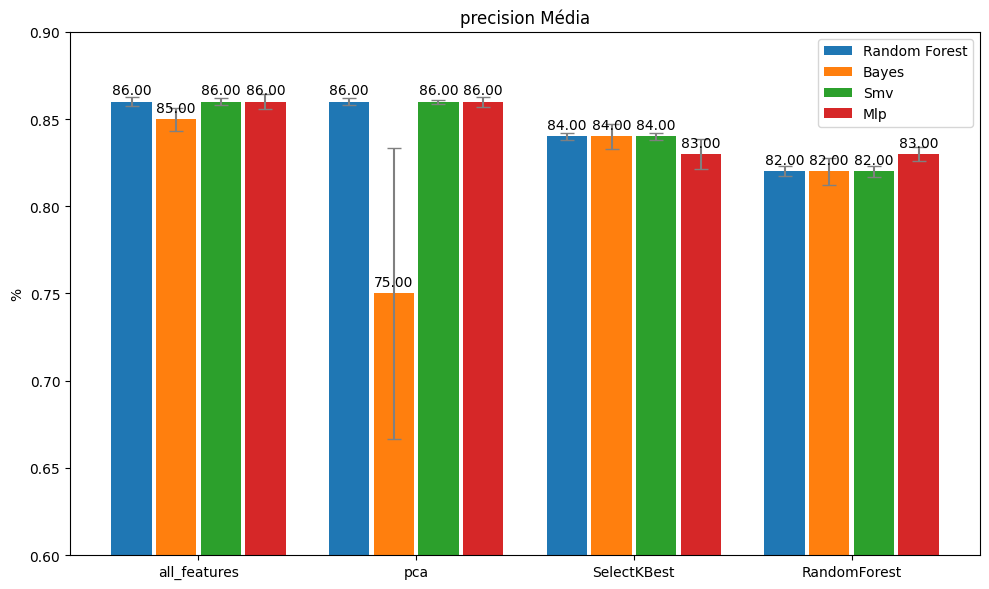

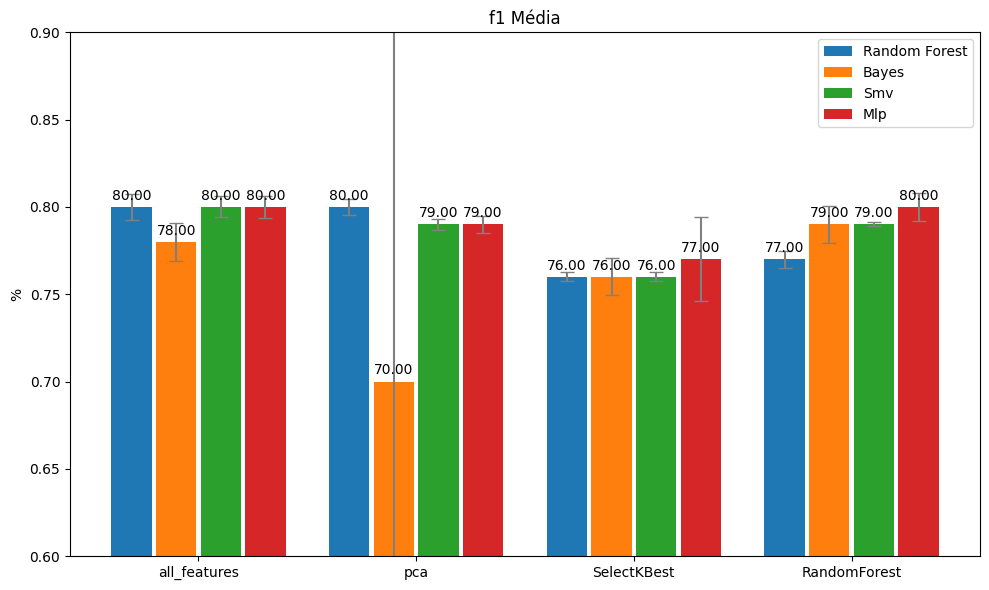

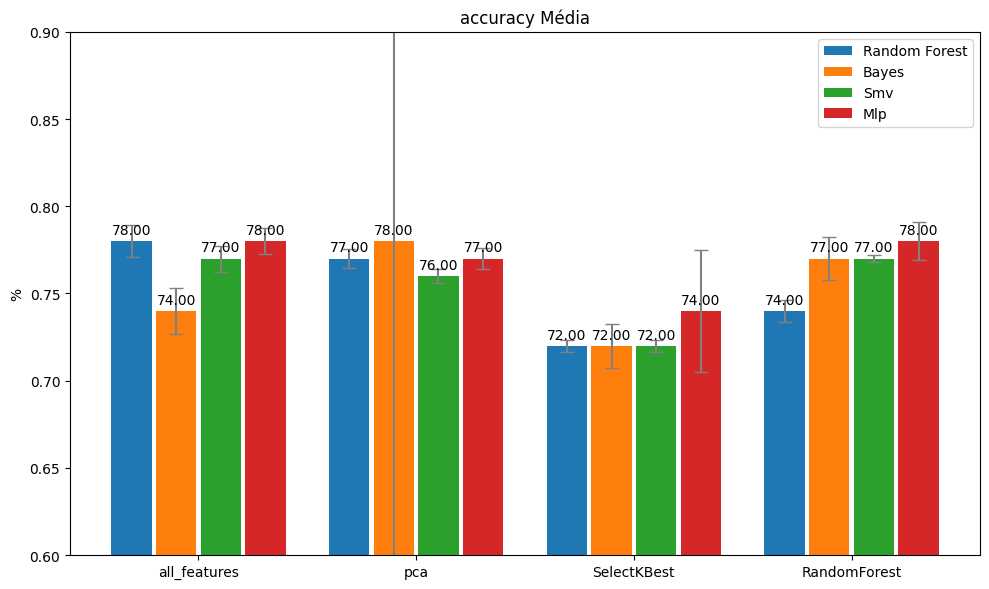

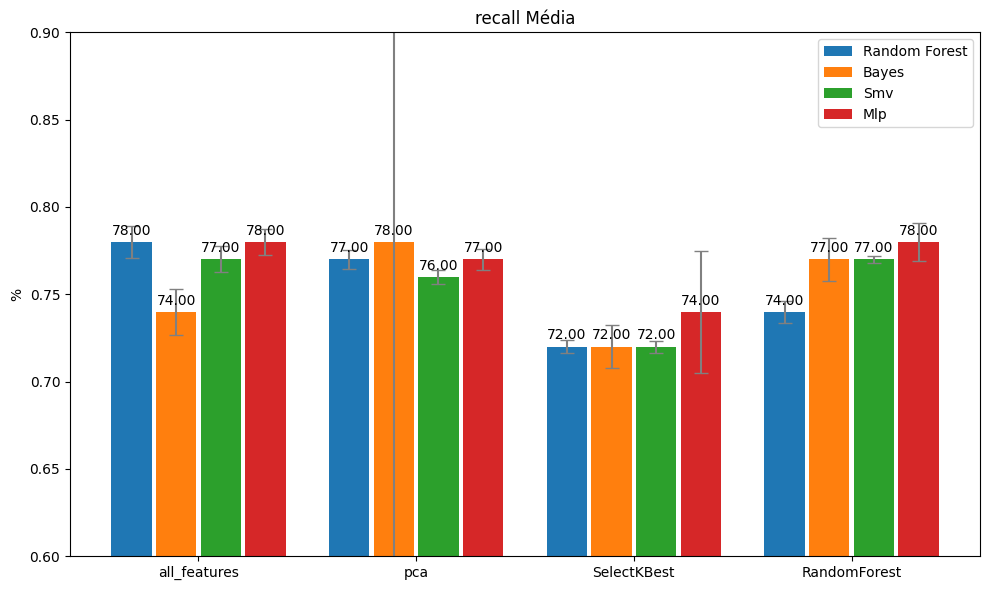

In [8]:
plot.n_modelos(json, 'precision')
plot.n_modelos(json, 'f1')
plot.n_modelos(json, 'accuracy')
plot.n_modelos(json, 'recall')